# 🎓 **Applied Artificial Intelligence Master**

## 🤖 **Course: Advanced Machine Learning Methods (Gpo 10)**

### 🏛️ Tecnológico de Monterrey

#### 👨‍🏫 **Lead Professor:** Dr. José Antonio Cantoral Ceballos
#### 👩‍🏫 **Assistant Professor:** Dra. Yetnalezi Quintas Ruiz

### 📊 **Activity 2c: Exploring Transfer Learning with CIFAR-10**

#### 📅 **February 11th, 2025**

### 👥 Team 3

#### **Students:**
* 🧑‍💻 Luis Gerardo Sanchez Salazar (A01232963)
* 🧑‍💻 Javier Augusto Rebull Saucedo (A01795838)
* 🧑‍💻 José Manuel Toral Cruz (A01122243)
* 🧑‍💻 Juan Carlos Pérez Nava (A01795941)
* 🧑‍💻 Oscar Enrique García García (A01016093)

# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.




### Import libraries

In ths part of the code we are loading all the libraries needed to run succesfully the contents of this notebook.

* Numpy: Used for numerical operations, math functions and arrays and matrices manipulation.
* Matplotlib: Used to create and display plots, charts and other visualization tools for data analytics or display of results.
* Time: This function is to retrieve a time value and in this notebook is mainly used to calculate iterations execution times.
* Torch: One of the most used neural network and deep learning frameworks. Used for data, structure and model management.
* Torch DataLoader: This utility is used for dataset handling to make iterable objects for mini-batches generation.
* Torch Sampler: This library handles the data sampling structure, like mini-batch creation and sampling type.
* Torchvision Datasets: This feature is used to load popular or standard datasets that are already available from the torchvision library.
* Torchvision Transforms: This is a useful module to apply transformation to images, like resizing, croppiping and normalization.


In [ ]:
#For math operations, plotting and execution time monitoring
import numpy as np
import matplotlib.pyplot as plt
import time

#library specialized in tensor computing
import torch
import torch.nn as nn
import torch.nn.functional as F

#Torchvision is a PyTorch add-on library primarily used for computer vision
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision import models

import warnings
warnings.filterwarnings('ignore')

### Define Device

This function returns `True` if PyTorch detects a CUDA-compatible GPU on the system. If a GPU is not available, the device is set to perform operations on the CPU.

This section of the code allows the notebook to select what device to use for the model training and evaluation processes. If a GPU is available, this code snippet will enable it to be used as the provessing device; if not, the notebook will continue running on the CPU.
It is important to mention that as model sizes and training complexity increase, it is highly recommended to use GPU to reduce training size.
Particularly in out team's experience, we did a combination of local GPU and T4 GPU from Google Colab Pro.


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


### Dataset Handling

For this exercise, the `CIFAR10` dataset. This is a popular and widely used dataset for evaluating or training of deep learning models. It contains a large group of images with 10 classes for different animals and objects.

In this part of the code, the dataset for the notebook is downloaded, configured and split as needed.
In this case, a value of 45,000 samples is used for the Training set with a mini-bath size of 64. It is recommended to always use powers of 2 as the mini-batch size for better memory handling.

There's three main concepts to explain in this section of code:
* Dataset download: For each set of data (Train, Validation and Test), a `cifar10` dataset object is created based on the specified data path. This object will contain al x and y values for the dataset. By setting the argument `train` to `True` or `False` the dataset portion where data is gonna be retrieved is defined, either from the Training or the Test portion of `CIFAR 10`.
* Dataset transformation: The downloaded data, in this case for the cifar10 dataset, is transformed based on the `transform` argument. By using `T.Compose`, a function from the torchvision.transforms library in PyTorch that allows you to combine multiple transformations into one, several 3 transformations are applied particularly to this case, including the resizing of the input images to 224x224 pixels. Also, the input is converted in tensor form and data is normalized. The values used for normalization (mean and standard deviation for each one of the 3 RGB channels of the image) are known values for the CIFAR10 dataset to achieve a standard deviation of 1 and a mean of 0.
* Dataset Dataloader: A Dataloader object is created out of the defined dataset. This is an iterable object which contains all the minibatches generated from the previously created (or like in this case, downloaded) dataset. The data is sorted randomly to avoid undesired biases during the training process and also the size of the sample is set based on the previously defined values.

In summary, this code prepares and loads the CIFAR-10 training, validation, and test datasets, applying specific transformations and managing the data in mini-batches.

It is important to mention that if the dataset has already been downloaded, the output of this section will just show a message acknowledging this.

In [ ]:
DATA_PATH = 'Data/'
NUM_TRAIN = 45000
MINIBATCH_SIZE = 64
transform =     T.Compose([
                T.Resize(224),
                T.ToTensor(),
                T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])

# Training set loader
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation set loader
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Testing set loader
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

100%|██████████| 170M/170M [00:02<00:00, 80.6MB/s]


Extracting Data/cifar-10-python.tar.gz to Data/
Files already downloaded and verified
Files already downloaded and verified


In this section of the code we display a summary of the training set created before, including the `cifar_10` and `train_loader` contents.

The `batch_size` attribute within `train_loader` represents the number of data samples that are processed in each iteration during model training.

The size information of the mini batches created for the training data set is calculated and displayed in the following lines of code:

In [ ]:
#Cifar10 print
print("="*50)
print("cifar10_train:".center(50))
print("="*50)
print(cifar10_train)
print("="*50)

total_samples = len(cifar10_train)
batch_size = train_loader.batch_size
partial_batch = total_samples % batch_size != 0
full_mini_batches = int(total_samples/batch_size)
total_mini_batches = full_mini_batches + partial_batch
tensors_shape, _ = next(iter(train_loader))
tensor_shape = torch.tensor(tensors_shape.shape)

#Print training data values
print("train_loader:".center(50))
print("="*50)
print(f'\n📊 Training Data:')
print(f'   ├─ Total samples: {total_samples}')
print(f'   ├─ Batch Size: {batch_size}')
print(f'   ├─ Tensor Shape: {tensor_shape}')
print(f'   └─ Mini Batches: {total_mini_batches}')
print(f'        ├─ {full_mini_batches} Full Mini Batches of size {tensor_shape[0]}')
if partial_batch:
  print(f'        └─ 1 Partial Mini Batch')

                  cifar10_train:                  
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: Data/
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )
                  train_loader:                   

📊 Training Data:
   ├─ Total samples: 50000
   ├─ Batch Size: 64
   ├─ Tensor Shape: tensor([ 64,   3, 224, 224])
   └─ Mini Batches: 782
        ├─ 781 Full Mini Batches of size 64
        └─ 1 Partial Mini Batch


### Display image

Here is a random image from the CIFAR10 dataset is loaded and display along with the class that it belongs to.

Shown picture is: Frog


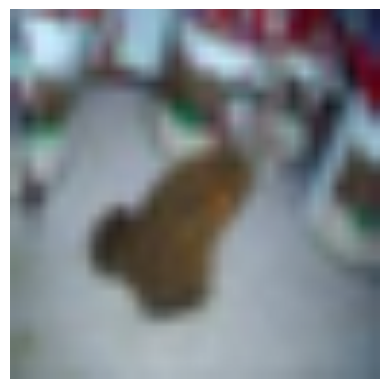

In [ ]:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'Shown picture is: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

### Accuracy function

#### Highlights for Model Evaluation

This function evaluates the performance of a model on a specific dataset by calculating accuracy as the primary metric. It provides a straightforward and quantitative measure of how well the model is predicting on that dataset.

This function is coded to iterate through the test portion of the dataset and count both good and total predictions with the specified model. This to calculate and return the accuracy percentage of the model on a specific data set.

Some highlights of the function are explained below:

**`model.eval()`**: Configures the model to evaluation mode. This deactivates
training-specific behaviors or layers, such as:

* **Dropout**: Deactivated, allowing all neurons to contribute fully during inference.

* **Batch Normalization**: Uses the learned running estimates (mean and variance) without updating them, ensuring consistency in predictions during inference.

**`torch.no_grad()`** Disables gradient computation within this block of code. The benefits include:

* **Memory Savings**: By not calculating or storing gradients, memory usage is reduced.

* **Increased Speed**: Accelerates the evaluation process by skipping unnecessary backpropagation operations.

* **Avoids Unnecessary Data Storage**: Prevents storing information that's only relevant during training, optimizing resources during validation or testing.

**`scores = model(xi)`**: Feeds the inputs through the model to obtain preliminary predictions. These scores are the raw outputs of the model before applying activation functions like Softmax.

In [ ]:
# Accuracy calculation of a model
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for (xi, yi) in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi)
            _, pred = scores.max(dim=1)
            num_correct += (pred == yi).sum()
            num_total += pred.size(0)
        return float(num_correct)/num_total

### Training Loop

#### Highlights for Trainig Loop

This function is coded to perform the training process of a deep learning model; it receives a model, an optimiser and the number of training epochs as  inputs. This training process is achieved by iterating over the training data loader containing the mini-batches of features `x` and corresponding labels `y`; evaluating the loss and model performance through the different epochs, updating the model weights by using backpropagation. The function will then store and display the results for each epoch. More details on the function below:


<br>


**`epoch_results = {'epoch': [], 'loss': [], 'accuracy': [], 'exec_time': []}`**: Keep a record of the loss history and validation accuracy throughout the training epochs, along with the processing time for each one of these.

* **`history['loss']`:** A list that will store the value of the loss function at the end of each epoch.

* **`history['val_acc']`:** A list that will store the accuracy on the validation set at the end of each epoch.

* **`history['epoch']`:** A list that will store the epoch index.

* **`history['val_acc']`:** A list that will store the execution time in seconds per epoch.

<br>

**`model = model.to(device=device)`**: Moves the model to the specified device (CPU or GPU). This ensures that both the model and the data are located on the same device, which is essential—especially when using a GPU to accelerate training.

<br>

**`model.train()`**: Activates training mode, which is essential for certain layers to function correctly. For example:

* **Dropout Layers:** Randomly deactivate certain neurons during training to prevent overfitting.

* **Batch Normalization Layers:** Update running statistics (mean and variance) during training but use them as fixed parameters during evaluation.

<br>


**`cost = F.cross_entropy(input=scores, target=yi)`**: Calculates the loss using cross-entropy, which is suitable for classification tasks.

Measures the difference between the predicted class probabilities and the actual class labels.

Penalizes the model when the predicted probability for the actual class is low, encouraging the model to produce high probabilities for the correct classes


<br>

**`optimiser.zero_grad()`**: Resets the gradients of all model parameters to avoid accumulation from the previous batch, which might lead to incorrect weight updates.

If not reset, accumulated gradients can cause the optimization algorithm to make larger updates than intended, potentially overshooting minima or causing instability.


<br>


**`cost.backward()`**: Computes the gradients of the loss with respect to each model parameter.

Propagates the error backward through the network, calculating each parameter's contribution to the overall loss.

These gradients are stored in the .grad attribute of each parameter and are used by the optimizer to update the weights.


<br>


**`optimiser.step()`**: Updates the model's weights using the calculated gradients.

The optimizer adjusts each parameter in the direction that minimizes the loss, based on its specific algorithm (e.g., SGD, Adam)

Gradients indicate both the direction and magnitude of parameter adjustments needed to minimize loss.


<br>


**Importance of Tracking Loss and Accuracy**:

By storing the loss and accuracy values at each epoch, you can plot learning curves to visualize and understand the training process. This helps identify issues like overfitting (where training loss decreases while validation loss increases) or underfitting (where both losses remain high).

Visualizing these metrics allows for better insights into how the model learns over time.


<br>


**Hyperparameter Optimization:**

Adjusting parameters such as the **learning rate**, **batch size**, and **number of epochs** can significantly improve the model's performance.

* **Learning Rate:** Controls how much the model weights are updated during training.

* **Batch Size:** Determines the number of samples that propagate through the network before updating the weights.

* **Number of Epochs:** Sets how many times the entire training dataset is passed forward and backward through the neural network.

In [ ]:
def train(model, optimiser, epochs=100):
    model = model.to(device=device)
    epoch_results = {'epoch': [], 'loss': [], 'accuracy': [], 'exec_time': []}
    for epoch in range(epochs):
        start_time = time.time()
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            cost = F.cross_entropy(input= scores, target=yi)
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()
        acc = accuracy(model, val_loader)
        end_time = time.time()
        epoch_time = end_time - start_time
        epoch_results['epoch'].append(epoch)
        epoch_results['loss'].append(cost.item())
        epoch_results['accuracy'].append(acc)
        epoch_results['exec_time'].append(epoch_time)
        print(f'Epoch: {epoch+1:3d}/{epochs} | Loss: {cost:.6f} | Accuracy: {acc*100:.2f}% >> {epoch_time:.2f} seconds')
    return epoch_results

### Plot Function

#### Highlights for the Plot function

This function uses the `epoch_results` output of the training loop function previously defined and plots two main figures:

* **Training Loss Over Time:** This chart displays the calculated loss over each epoch

* **Validation Accuracy Over Time:** This chart displays the calculated accuracy over each epoch




Along with the plots, a summary table is printed containing a summary of the training statistics results, including:
* **Final Loss**: Loss value obtained during the last training epoch
* **Final Accuracy**: Accuracy result after the last training epoch
* **Best Accuracy**: Highest accuracy value found during all epochs

In [ ]:
def plot_training(history):
    plt.figure(figsize=(15, 6), dpi=120)

# Calculate mean metrics for reference lines
    mean_loss = np.mean(history['loss'])
    mean_acc = np.mean(history['accuracy'])

# Add a main title for the entire figure
    plt.suptitle('Training Progress Over Epochs', fontsize=18, fontweight='bold', y=1.02)

# First subplot: Training Loss (left side)
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'],
            linewidth=2.5,
            label='Training Loss',
            color='#2ecc71',  # Green color
            marker='o',  # Add markers for each epoch
            markersize=6,
            markeredgecolor='black',
            markeredgewidth=0.5)
    plt.axhline(y=mean_loss,
                color='#e74c3c',  # Red color
                linestyle='--',
                alpha=0.8,
                linewidth=2,
                label=f'Mean Loss: {mean_loss:.4f}')
    plt.title('Training Loss Over Time', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Epoch', fontsize=14, labelpad=10)
    plt.ylabel('Loss', fontsize=14, labelpad=10)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(fontsize=12, loc='upper right', frameon=True, fancybox=True, shadow=True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Second subplot: Validation Accuracy (right side)
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'],
            linewidth=2.5,
            label='Validation Accuracy',
            color='#3498db',  # Blue color
            marker='o',  # Add markers for each epoch
            markersize=6,
            markeredgecolor='black',
            markeredgewidth=0.5)
    plt.axhline(y=mean_acc,
                color='#e74c3c',  # Red color
                linestyle='--',
                alpha=0.8,
                linewidth=2,
                label=f'Mean Accuracy: {mean_acc*100:.2f}%')
    plt.title('Validation Accuracy Over Time', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Epoch', fontsize=14, labelpad=10)
    plt.ylabel('Accuracy', fontsize=14, labelpad=10)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(fontsize=12, loc='lower right', frameon=True, fancybox=True, shadow=True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add more space between subplots
    plt.subplots_adjust(wspace=0.4)  # Increase spacing between subplots

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print summary statistics with enhanced formatting
    print("\n" + "="*60)
    print("📊 Training Summary Statistics 📊".center(60))
    print("="*60)
    print(f"• Final Loss: {history['loss'][-1]:.4f}")
    print(f"• Final Accuracy: {history['accuracy'][-1]*100:.2f}%")
    print(f"• Best Accuracy: {max(history['accuracy'])*100:.2f}%")
    print("="*60 + "\n")

### Transfer learning

#### Background

When talking about deep learning, extensive work has been done on the image and vision processing fields. All this efforts resulted in models that tend to work good when analyzing certain types of data. With this said, the concept of **transfer learning** appeared to help analyze and solve new deep learning challenges in a way where all the acquired knowledge from previous efforts is applied in the form of pre-trained models. These models have been previously trained based on a large quantity of data and have shown strong performance. By using transfer learning, computing needs are decreased since the pre-trained model weights have already been optimized. Combining this pre-trained models with additional neural layers specific to the new task or challenge to solve, good performance is achieved without the need of starting a model structure from scratch. This is possible because when it comes to images, they all have common patterns like shapes, colors, edges, textures and visible features that are detected by the pre-trained model.

#### Model selection and download

The `models` module from `torchvision` provides different pre-trained models that can be used for transfer learning as their weights have been previously optimized. As a baseline, `resnet18` was used to later be compared with other pre-trained models based on its performance with the `CIFAR10` dataset.
* **ResNet18**: This model has 18 layers which is relatively a small architecture when looking at its performance. For datasets like CIFAR10 this is a good starting point since it tends to generalize images very well since its calculated weights are based on larger image datasets.

<br>

Along with ResNet18, three other pre-trained models were selected to be tested:
* **DenseNet121**: In comparison to ResNet18, DenseNet121 is a bigger model with 121 layers. This model was selected to see if the complexity or size of the pre-trained model would positively affect the results in the cifar10 dataset when compared to the results of ResNet18. This model is setup in a way where the input to each layer is concatenated from all preceding layers, reusing features help this model parameter efficiency, which means it learns better features while avoiding excess weight calculations.

* **VGG16**: This model, proposed by the Oxford University, features a 16 neural layers from which 13 are CNN, while the remaining 3 are fully connected layers. This is considered a simple model yet effective for image classification. One of its main benefits is its feature extraction capability, since the defined structure allows it to learn hierarchical features.

* **AlexNet**: Released in 2012, AlexNet is a smaller model with 5 CNN and 3 fully connected layers. This is one of the first models to use ReLU as its activation function and it tends to be specially effective on small datasets.This model was selected as it seems to be quite simple in comparison to all others, which increases curiosity on its performance with the cifar10 dataset.

<br>

The following slice of code performs the download and and storing of all the pre-trained models mentioned above:

In [ ]:
#Download model and apply to a sequential network.
model_resnet18 = models.resnet18(pretrained=True)

model_densenet121 = models.densenet121(pretrained=True)

model_vgg = models.vgg16(pretrained=True)

model_alexnet = models.alexnet(pretrained=True)



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 145MB/s]
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 128MB/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 194MB/s]
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 174MB/s]


### Strategy for the pre-trained model's architecture

In this next section of the notebook, a general structure of each model as downloaded is shown. This helped us observe the layers that are contained in the pre-trained model and get an overlook of what changes would need to be made to adapt this structure to our final model for the CIFAR10 Dataset.


In general terms and for most of the cases, the last fully connected layer of the model is changed for the output size to match the classes of the dataset, in the CIFAR10 case, `out_features=10`.


It is important to mention as well how we need to *freeze* the layers of the model that does not need to be trained anymore due to their weights been already optimized for the pre-processed model. For this, we set `parameter.requires_grad = False` for each one of the layers that we don't want be re-trained.


#### Definition of layer_names( ) function

The first part of the code inclues a portion that recursively traverses the model's structure, constructing a hierarchical list of the layer names. The most notable parts of the code are mentioned below:

* **`layer_names_list`**: An empty list named layer_names_list is initialized. This
list will store the names of the layers. Renaming it to layer_names_list helps avoid confusion with the function name.

* **`for i, (name, layer) in enumerate(model.named_children())`**: This loop iterates over the layers or submodules of the model. **`model.named_children()`** returns an iterator of tuples (`name`, `layer`), where `name` is the layer/module name and `layer` is the layer/module object.

* **`layer_type = layer.__class__.__name__`**: Retrieves the layer type ('`Linear`', '`Conv2d`', '`ReLU`').

* **`if include_submodules and hasattr(layer, 'named_children')`**: This condition checks two things:

  1. **`include_submodules`**: Whether to include sublayers.

  2. **`hasattr(layer, 'named_children')`**: Whether the current layer has the `named_children` attribute, which indicates it is a module containing other layers.

* **`layer_names_list.extend(layer_names(layer, include_submodules=include_submodules, prefix=f"{current_name}.", level=level + 1))`**: If the previous condition is true, the function layer_names is called recursively for the submodule (layer). The prefix is updated by adding the current layer name and a dot (.) to indicate the hierarchy

* **`return layer_names_list`**: Finally, the function returns the complete list of layer names.

In [ ]:
def layer_names(model, include_submodules=True, prefix="", level=1):
    layer_names_list = []
    for i, (name, layer) in enumerate(model.named_children()):
        layer_type = layer.__class__.__name__
        current_name = f"{prefix}{i+1} - {name} ({layer_type})"
        layer_names_list.append(current_name)
        if include_submodules and hasattr(layer, 'named_children'):
            layer_names_list.extend(layer_names(layer, include_submodules=include_submodules, prefix=f"{current_name}.", level=level + 1))
    return layer_names_list

#### Definition of get_input_size( ) function

As seen on previous exercises, when using convolutional neural networks, the shape of the product changes on each layer. For this activity, we are adding a group of fully connected layers after the CNN. These layers are for the most part defined by the user.
To manage the change of shapes from model to model, a function that gives us the shape of the output after the convolutional network portion of the model was created. This to pass over to the next section containing the flatten layer along with the following fully connected layers.

The function **`get_input_size()`** defined below performs this task, since it is designed to determine the input size (in terms of the number of output elements of the last layer of the model) to pass the expected value to the next section of the model. This is useful for knowing the output size of the convolutional or similar layers that precede the linear or fully connected layers.

It takes the following inputs:

* **model**: The previously defined model which is going to modify the number of elements.
* **loader**: The dataset which the model is going to be changing, in this particular size, the input woould be the training_loader for the CIFAR10 dataset
* **device**: This is to pass the model to the GPU, in case there is one available.

With this information, the function is able to pass the input data through the model and then multiply the last 3 arguments of the shape of the ouput tensor, returning this value to pass over to the `in_features` argument of the following fully connected network.

In [ ]:
#Calculate input size for next layer by getting the tensor shape
#of the model based on a loader
def get_input_size(model, loader, device='cuda'):
  inputs, labels = next(iter(loader))
  inputs = inputs.to(device)
  model = model.to(device)
  with torch.no_grad():
    output = model(inputs)
    input_size = torch.tensor(output.shape[-3:]).prod().item()
  return input_size

#### Preview, processing and final architecture of the models

In the following section, each one of the four downloaded pre-trained models are visualized, then processed and finally, a full model gets ready to be passed through the training loop.

#### ResNet18

In the next portion of code, the `layer_names()` function is used to display the initial structure of ResNet18.

In [ ]:
#Using the layer_names function to display the ResNet18 base structure
print(f"{'>' * 50}")
print(f'ResNet18 Initial structure summary:'.center(50))
print(f"{'>' * 50}")
layer = layer_names(model_resnet18,True,'Layer_',1)
for ly in layer: print(ly)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
       ResNet18 Initial structure summary:        
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Layer_1 - conv1 (Conv2d)
Layer_2 - bn1 (BatchNorm2d)
Layer_3 - relu (ReLU)
Layer_4 - maxpool (MaxPool2d)
Layer_5 - layer1 (Sequential)
Layer_5 - layer1 (Sequential).1 - 0 (BasicBlock)
Layer_5 - layer1 (Sequential).1 - 0 (BasicBlock).1 - conv1 (Conv2d)
Layer_5 - layer1 (Sequential).1 - 0 (BasicBlock).2 - bn1 (BatchNorm2d)
Layer_5 - layer1 (Sequential).1 - 0 (BasicBlock).3 - relu (ReLU)
Layer_5 - layer1 (Sequential).1 - 0 (BasicBlock).4 - conv2 (Conv2d)
Layer_5 - layer1 (Sequential).1 - 0 (BasicBlock).5 - bn2 (BatchNorm2d)
Layer_5 - layer1 (Sequential).2 - 1 (BasicBlock)
Layer_5 - layer1 (Sequential).2 - 1 (BasicBlock).1 - conv1 (Conv2d)
Layer_5 - layer1 (Sequential).2 - 1 (BasicBlock).2 - bn1 (BatchNorm2d)
Layer_5 - layer1 (Sequential).2 - 1 (BasicBlock).3 - relu (ReLU)
Layer_5 - layer1 (Sequential).2 - 1 (BasicBlock).4 - conv2 (Conv2d)

As noticed from the previous section, the last part of the model is a fully connected layer.
In the following portion of code, this last layer is deleted, as we are going to add some more, finalizing with a fully connected layer which its output size matches the number of classes of the dataset (10).


After deleting the last layer, we *freeze* the weights for the pre-trained model by setting `parameter.requires_grad = False` for each layer. This is done so the parameters don't get calculated again during the training process.


After that, we define the learning rate, number of epochs, in_features (which is calculated with the function described before), and the number of classes of the model.


Finally, we define the model along with the optimiser. The model includes the `model_resnet18_aux` modules with the pre-trained model data, and some linear layers; including a `flatten()` to match the size after the convolutional neural network portion.


To complement the pre-trained model's structure, it was decided to use one hidden layer followed by an output layer. This avoids unnecesary complexity for this model and dataset which is relatively small, while we are able to reinforce and enhance classification features of the general model. Adding these layers improves adaptability to the model, helping adjust to the specific task given, which is to predict the 10 classes of cifar10 while at the same time, adding these fully connected layers refine features extracted by convolutional layers, allowing the model to learn complex combinations of features from the previous layers contained within the pre-trained information. As per the sizes, we decided to use an output of 128 for the hidden layer after testing different values. This gave us a good balance between computational expense (which tends to be heavier for this models) and training results.


During the experimentation process, different learning rate values varying from 1e-6 to 1e-2 were attempted. The most consistant training process was obtained with `lr = 5e-4` for this and the following models. The experiment started with 3 epochs to see if the model was actually training, once a decent result was achieved during this 3 epochs, the number was increased to 10 to have a better understanding of the model behavior. As mentioned before, this is because of computational expense and time resources.


Finally, the model is displayed to show the changes made and how it is going to be passed to the training loop.

In [ ]:
#Delete last fully connected layer
model_resnet18_aux = nn.Sequential(*list(model_resnet18.children())[:-1])

#Change requires_grad parameter to False in all layers
for i, parameter in enumerate(model_resnet18_aux.parameters()):
    parameter.requires_grad = False

#Define ResNet18 model
lr = 5e-4
epochs = 10
in_features = get_input_size(model_resnet18_aux, train_loader)
classes = 10

resnet18 = nn.Sequential(model_resnet18_aux,
                        nn.Flatten(),
                        nn.Linear(in_features=in_features, out_features=128),  # First hidden layer
                        nn.ReLU(),
                        nn.Dropout(p=0.3),
                        nn.BatchNorm1d(128),
                        nn.Linear(in_features=128, out_features=classes),   # Output layer
                        #nn.Softmax(dim=1)
                       )
resnet_optimiser = torch.optim.Adam(resnet18.parameters(), lr=lr, betas=(0.9, 0.999))

print(f"{'>' * 50}")
print(f'ResNet18 Final Model Structure:'.center(50))
print(f"{'>' * 50}")
print(resnet18)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
         ResNet18 Final Model Structure:          
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_

#### DenseNet121

Similar to ResNet, the summary of the DenseNet121 model is shown in this code.

In [ ]:
print(f"{'>' * 50}")
print(f'DenseNet121 Initial structure summary:'.center(50))
print(f"{'>' * 50}")
layer = layer_names(model_densenet121,True,'Layer_',1)
for ly in layer: print(ly)


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
      DenseNet121 Initial structure summary:      
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Layer_1 - features (Sequential)
Layer_1 - features (Sequential).1 - conv0 (Conv2d)
Layer_1 - features (Sequential).2 - norm0 (BatchNorm2d)
Layer_1 - features (Sequential).3 - relu0 (ReLU)
Layer_1 - features (Sequential).4 - pool0 (MaxPool2d)
Layer_1 - features (Sequential).5 - denseblock1 (_DenseBlock)
Layer_1 - features (Sequential).5 - denseblock1 (_DenseBlock).1 - denselayer1 (_DenseLayer)
Layer_1 - features (Sequential).5 - denseblock1 (_DenseBlock).1 - denselayer1 (_DenseLayer).1 - norm1 (BatchNorm2d)
Layer_1 - features (Sequential).5 - denseblock1 (_DenseBlock).1 - denselayer1 (_DenseLayer).2 - relu1 (ReLU)
Layer_1 - features (Sequential).5 - denseblock1 (_DenseBlock).1 - denselayer1 (_DenseLayer).3 - conv1 (Conv2d)
Layer_1 - features (Sequential).5 - denseblock1 (_DenseBlock).1 - denselayer1 (_DenseLayer).4 - norm2 (BatchNorm2d)

As observed, this model is way larger that the previous one, containing a total of 121 layers, including convolutional layers, batch normalization layers and fully connected layers.

The processing performed to DenseNet121 model was pretty much the same as the one performed to ResNet:

* Deleting the last fully connected layer
* Freeze pre-trained model parameters for each layer with parameter `requires_grad = False`
* Add a flatten layer, a hidden layer and an output layer to the model
* Define learning rate, epochs, input and outuput features
* Define the optimiser
* Print the final model to be passed through the training loop

This model structure was chosen for the most part because of the the same reasons than ResNet, adding the fact that it was desired to have similar final fully connected network structures added to be able to compare the performance difference of the pre-trained model architectures.


After all the changes, the final model structure is printed.


In [ ]:
#Delete last fully connected layer
model_densenet121_aux = nn.Sequential(*list(model_densenet121.children())[:-1])

#Change requires_grad parameter to False in all layers
for i, parameter in enumerate(model_densenet121_aux.parameters()):
    parameter.requires_grad = False

#Define DenseNet121 model
lr = 5e-4
epochs = 10
in_features = get_input_size(model_densenet121_aux, train_loader)
classes = 10

densenet121 = nn.Sequential(model_densenet121_aux,
                        nn.Flatten(),
                        nn.Linear(in_features=in_features, out_features=128),  # First hidden layer
                        nn.ReLU(),
                        nn.Dropout(p=0.3),
                        nn.BatchNorm1d(128),
                        nn.Linear(in_features=128, out_features=classes),   # Output layer
                        #nn.Softmax(dim=1)
                       )
densenet_optimiser = torch.optim.Adam(densenet121.parameters(), lr=lr, betas=(0.9, 0.999))

print(f"{'>' * 50}")
print(f'DenseNet121 Final Model Structure:'.center(50))
print(f"{'>' * 50}")
print(densenet121)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        DenseNet121 Final Model Structure:        
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), st

#### VGG16

Next, the pre-trained model VGG16 is displayed using the previously defined function `layer_names()` for better visibility.

In [ ]:
print(f"{'>' * 50}")
print(f'VGG  Initial structure summary:'.center(50))
print(f"{'>' * 50}")

layer = layer_names(model_vgg,True,'Layer_',1)
for ly in layer: print(ly)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
         VGG  Initial structure summary:          
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Layer_1 - features (Sequential)
Layer_1 - features (Sequential).1 - 0 (Conv2d)
Layer_1 - features (Sequential).2 - 1 (ReLU)
Layer_1 - features (Sequential).3 - 2 (Conv2d)
Layer_1 - features (Sequential).4 - 3 (ReLU)
Layer_1 - features (Sequential).5 - 4 (MaxPool2d)
Layer_1 - features (Sequential).6 - 5 (Conv2d)
Layer_1 - features (Sequential).7 - 6 (ReLU)
Layer_1 - features (Sequential).8 - 7 (Conv2d)
Layer_1 - features (Sequential).9 - 8 (ReLU)
Layer_1 - features (Sequential).10 - 9 (MaxPool2d)
Layer_1 - features (Sequential).11 - 10 (Conv2d)
Layer_1 - features (Sequential).12 - 11 (ReLU)
Layer_1 - features (Sequential).13 - 12 (Conv2d)
Layer_1 - features (Sequential).14 - 13 (ReLU)
Layer_1 - features (Sequential).15 - 14 (Conv2d)
Layer_1 - features (Sequential).16 - 15 (ReLU)
Layer_1 - features (Sequential).17 - 16 (MaxPool2d)
Layer_

This model, as it seems smaller than the previous one, it still has shown good feature extracting by combining convolutional layers along with fully connected layers.

Containing 13 convolutional layers followed by 4 fully connected layers (including the output layer), the model is highly used for image clasificacion.

The processed performed for this model in order to adapt it to this application using the CIFAR10 dataset was a bit different compared to the ones used for ResNet and DenseNet.

As seen on the model summary, this model contains not only one linear layer like the previous pre-trained models. It contains a block (Layer_3) with 2 fully connected layers, incuding it's activation function (ReLU) and it's respective droput, followed by an linear output layer. We decided that, in order to keep the model's integrity, we wanted to keep all this layers as they are, and then add some more during the final definition of the model.

The following processing was performed:

* Make the sequential model under `model_vgg_aux`
* Save the last module of the model (layer_3 which equals 2 in the model progression), contanining the linear layers, under `model_vgg_fc`
* Delete the whole module containing the fully connected layers
* Freeze the parameters on the remaining part of the model. Please note this has been saved in the previous step.
* Add a `flatten()` layer. It is important to mention that this was added here for the sizes to match after the convolutional layers section of the model.
* Add back the fully connected layers from the module deleted before. The weights on this layer will also be trained during the training loop.
* After the predefined fully connected layers of the model, the same set of linear layers that were added to the two previous examples were also included in VGG to keep consinstancy in the experiment.
* Same tests were performed regarding learning rate and epochs.

It is important to mention that in this specific case, the `get_input_size()` function was not used to determine the input layer. This is because the output layer of the model is already a flattened fully connected layer which size we already know from the model structure (`out_features=1000`).

It is worth to mention as well that several model combinations were tested for VGG, including just modifying only the last layer of module to to set  `out_features=10`. Slightly better results were observed with this setup, however, it was decided to keep the same structure of the model to keep consistency across the experiment. This addition was left as a comment for reference.

In [ ]:
#Make Model sequential
model_vgg_aux = nn.Sequential(*list(model_vgg.children()))

#Change output to 10 features to match classes
#model_vgg_aux[2][6] = nn.Linear(in_features=4096, out_features=10, bias=True)

#Save module 2 containing all FC layers
model_vgg_fc = model_vgg_aux[2]

#Delete last layer (in this case, all model 2)
model_vgg_aux = nn.Sequential(*list(model_vgg.children())[:-1])

#Change requires_grad parameter to False in all layers
for i, parameter in enumerate(model_vgg_aux.parameters()):
    parameter.requires_grad = False

#Add Flatten
model_vgg_aux.add_module('FLATTEN',nn.Flatten())

#Add Fully Connected Layers from model back. This has requires_grad=True to be trained
model_vgg_aux.add_module('FC',model_vgg_fc)

#Define VGG Model
lr = 5e-4
epochs = 10
in_features = 1000
classes = 10

vgg16 = nn.Sequential(model_vgg_aux,
                        nn.Linear(in_features=in_features, out_features=128),  # First hidden layer
                        nn.ReLU(),
                        nn.Dropout(p=0.3),
                        nn.BatchNorm1d(128),
                        nn.Linear(in_features=128, out_features=classes),   # Output layer
                        #nn.Softmax(dim=1)
                       )

vgg_optimiser = torch.optim.Adam(vgg16.parameters(), lr=lr, betas=(0.9, 0.999))

print(f"{'>' * 50}")
print(f'VGG16 Final Model Structure:'.center(50))
print(f"{'>' * 50}")
print(vgg16)


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
           VGG16 Final Model Structure:           
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  

#### AlexNet

Finally, the structure summary for AlexNet is printed using the previously defined `layer_names()` function:

In [ ]:
print(f"{'>' * 50}")
print(f'AlexNet Initial structure summary:'.center(50))
print(f"{'>' * 50}")
layer = layer_names(model_alexnet,True,'Layer_',1)
for ly in layer: print(ly)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        AlexNet Initial structure summary:        
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Layer_1 - features (Sequential)
Layer_1 - features (Sequential).1 - 0 (Conv2d)
Layer_1 - features (Sequential).2 - 1 (ReLU)
Layer_1 - features (Sequential).3 - 2 (MaxPool2d)
Layer_1 - features (Sequential).4 - 3 (Conv2d)
Layer_1 - features (Sequential).5 - 4 (ReLU)
Layer_1 - features (Sequential).6 - 5 (MaxPool2d)
Layer_1 - features (Sequential).7 - 6 (Conv2d)
Layer_1 - features (Sequential).8 - 7 (ReLU)
Layer_1 - features (Sequential).9 - 8 (Conv2d)
Layer_1 - features (Sequential).10 - 9 (ReLU)
Layer_1 - features (Sequential).11 - 10 (Conv2d)
Layer_1 - features (Sequential).12 - 11 (ReLU)
Layer_1 - features (Sequential).13 - 12 (MaxPool2d)
Layer_2 - avgpool (AdaptiveAvgPool2d)
Layer_3 - classifier (Sequential)
Layer_3 - classifier (Sequential).1 - 0 (Dropout)
Layer_3 - classifier (Sequential).2 - 1 (Linear)
Layer_3 - classifier (Seque

This model involves 5 convolutional layers using the activation function ReLU after each one of these, followed by 3 fully connected layers with the addition of ReLU as well.

Processing for this model was similar to the one performed for VGG16, since the fully connected layers are also contained within the same last module of the model.

* Make the sequential model under `model_alexnet_aux`
* Save the last module of the model (2), contanining the linear layers, under `model_alexnet_fc`
* Delete this whole module
* Freeze the parameters on the remaining part of the model
* Add a `flatten()` layer to match the following linear layers
* Add back the fully connected layers from the module deleted before
* After the predefined fully connected layers of the model, the same set of linear layers that were added to the three previous examples were also included in AlexNet to keep consinstancy in the experiment.
* Same tests were performed regarding learning rate and epochs

In [ ]:
#Make model Sequential
model_alexnet_aux = nn.Sequential(*list(model_alexnet.children()))

#Save module 2 containing all FC layers
model_alexnet_fc = model_alexnet_aux[2]

#Delete module 2
model_alexnet_aux = nn.Sequential(*list(model_alexnet.children())[:-1])

#Change requires_grad parameter to False in all layers
for i, parameter in enumerate(model_alexnet_aux.parameters()):
    parameter.requires_grad = False

#Add flatten layer aftetr convolutional section
model_alexnet_aux.add_module('FLATTEN',nn.Flatten())

#Add back the module with the fully connected layers
model_alexnet_aux.add_module('FC',model_alexnet_fc)

#Define AlexNet Model
lr = 5e-4
epochs = 10
in_features = 1000
classes = 10

alexnet = nn.Sequential(model_alexnet_aux,
                        nn.Linear(in_features=in_features, out_features=128),  # First hidden layer
                        nn.ReLU(),
                        nn.Dropout(p=0.3),
                        nn.BatchNorm1d(128),
                        nn.Linear(in_features=128, out_features=classes),   # Output layer
                        #nn.Softmax(dim=1)
                       )
alexnet_optimiser = torch.optim.Adam(alexnet.parameters(), lr=lr, betas=(0.9, 0.999))

print(f"{'>' * 50}")
print(f'AlexNet Final Model Structure:'.center(50))
print(f"{'>' * 50}")
print(alexnet)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
          AlexNet Final Model Structure:          
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mod

### Training the models

Once we have all of the four models correctly defined, they are ready to be passed through the training loop. This by using the previously defined `train()` function. For this, we pass the model defined in the previous section, the optimiser and the number of epochs.

It was decided to keep Adam as the optimization algorithm to adjust the network's weights during training. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an efficient optimization method that's well-suited for problems with sparse gradients and noisy data.

After completing the training process for the model, the data, which includes the training loss and accuracy for each epoch, is plotted by using the `plot_training( )` function that was previously defined in the notebook. With this, we are able to see how the model performs over each training epoch.


#### ResNet18

Training process for the ResNet18 model:

In [ ]:
restnet18_train= train(resnet18, resnet_optimiser, epochs)

Epoch:   1/10 | Loss: 1.152591 | Accuracy: 79.44% >> 79.04 seconds
Epoch:   2/10 | Loss: 1.895062 | Accuracy: 80.24% >> 75.91 seconds
Epoch:   3/10 | Loss: 1.171196 | Accuracy: 80.94% >> 76.40 seconds
Epoch:   4/10 | Loss: 0.769777 | Accuracy: 81.02% >> 75.81 seconds
Epoch:   5/10 | Loss: 1.170200 | Accuracy: 80.88% >> 75.29 seconds
Epoch:   6/10 | Loss: 1.556118 | Accuracy: 81.24% >> 76.87 seconds
Epoch:   7/10 | Loss: 1.043024 | Accuracy: 81.52% >> 75.95 seconds
Epoch:   8/10 | Loss: 0.519788 | Accuracy: 81.48% >> 76.61 seconds
Epoch:   9/10 | Loss: 0.582119 | Accuracy: 81.26% >> 75.71 seconds
Epoch:  10/10 | Loss: 0.510071 | Accuracy: 81.60% >> 76.10 seconds


Plotting the progession of Loss and Accuracy of the ResNet18 model over the training epochs

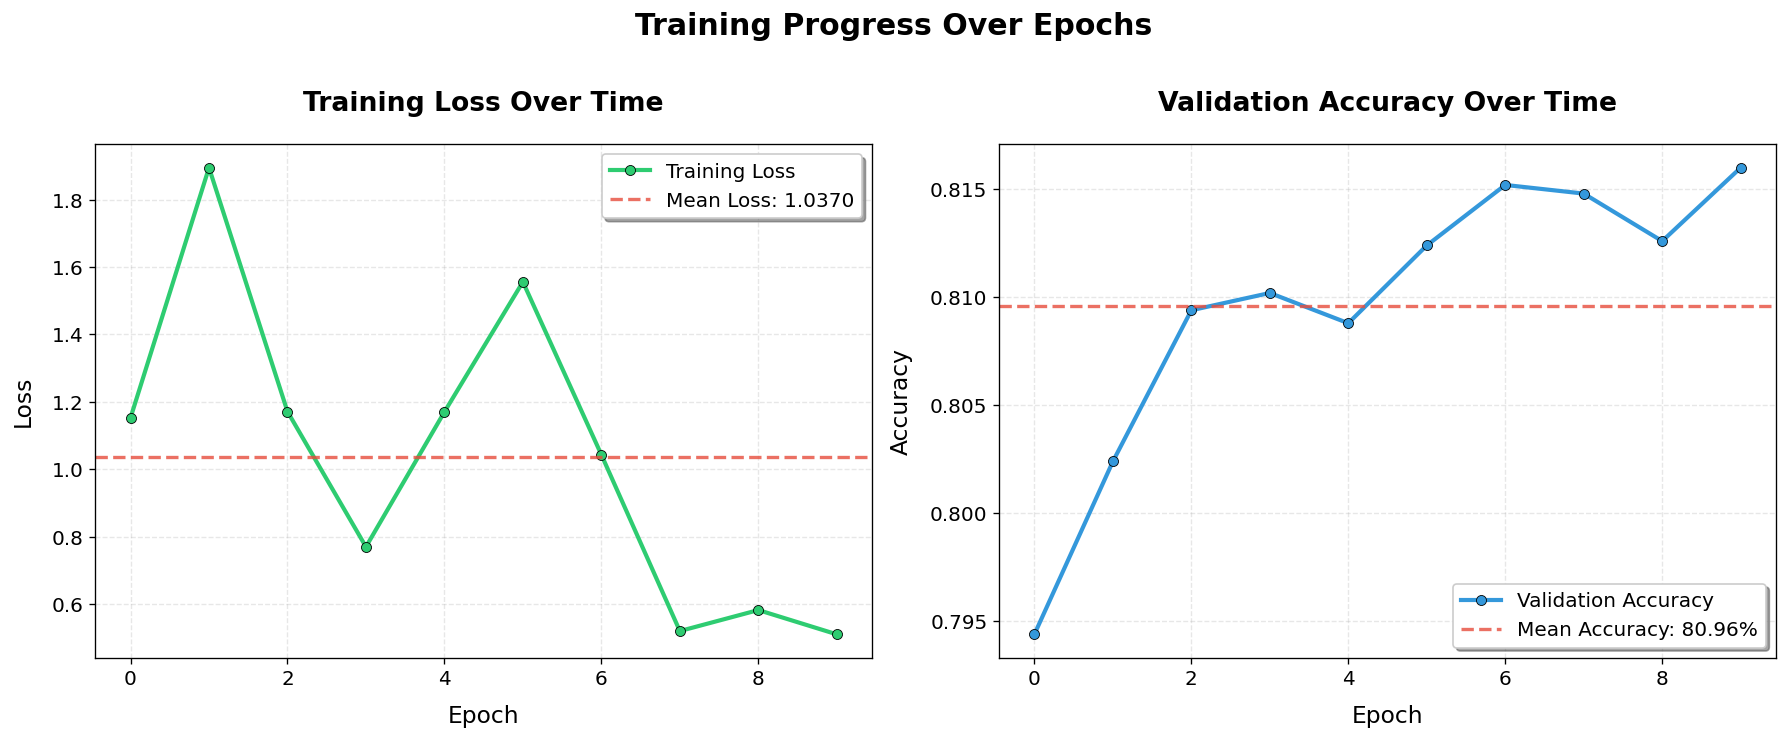


              📊 Training Summary Statistics 📊               
• Final Loss: 0.5101
• Final Accuracy: 81.60%
• Best Accuracy: 81.60%



In [ ]:
plot_training(restnet18_train)

#### DenseNet121

Training process for the DenseNet121 model:

In [ ]:
densenet121_train = train(densenet121, densenet_optimiser, epochs)

Epoch:   1/10 | Loss: 0.926900 | Accuracy: 86.78% >> 167.92 seconds
Epoch:   2/10 | Loss: 0.356511 | Accuracy: 86.66% >> 168.18 seconds
Epoch:   3/10 | Loss: 0.359220 | Accuracy: 87.20% >> 168.00 seconds
Epoch:   4/10 | Loss: 0.220673 | Accuracy: 86.54% >> 168.05 seconds
Epoch:   5/10 | Loss: 0.352204 | Accuracy: 86.28% >> 167.82 seconds
Epoch:   6/10 | Loss: 1.411222 | Accuracy: 86.88% >> 168.15 seconds
Epoch:   7/10 | Loss: 3.738170 | Accuracy: 86.58% >> 167.84 seconds
Epoch:   8/10 | Loss: 0.400758 | Accuracy: 86.58% >> 167.97 seconds
Epoch:   9/10 | Loss: 1.224365 | Accuracy: 86.76% >> 167.80 seconds
Epoch:  10/10 | Loss: 1.391963 | Accuracy: 86.66% >> 167.98 seconds


Plotting the progession of Loss and Accuracy of the DenseNet121 model over the training epochs

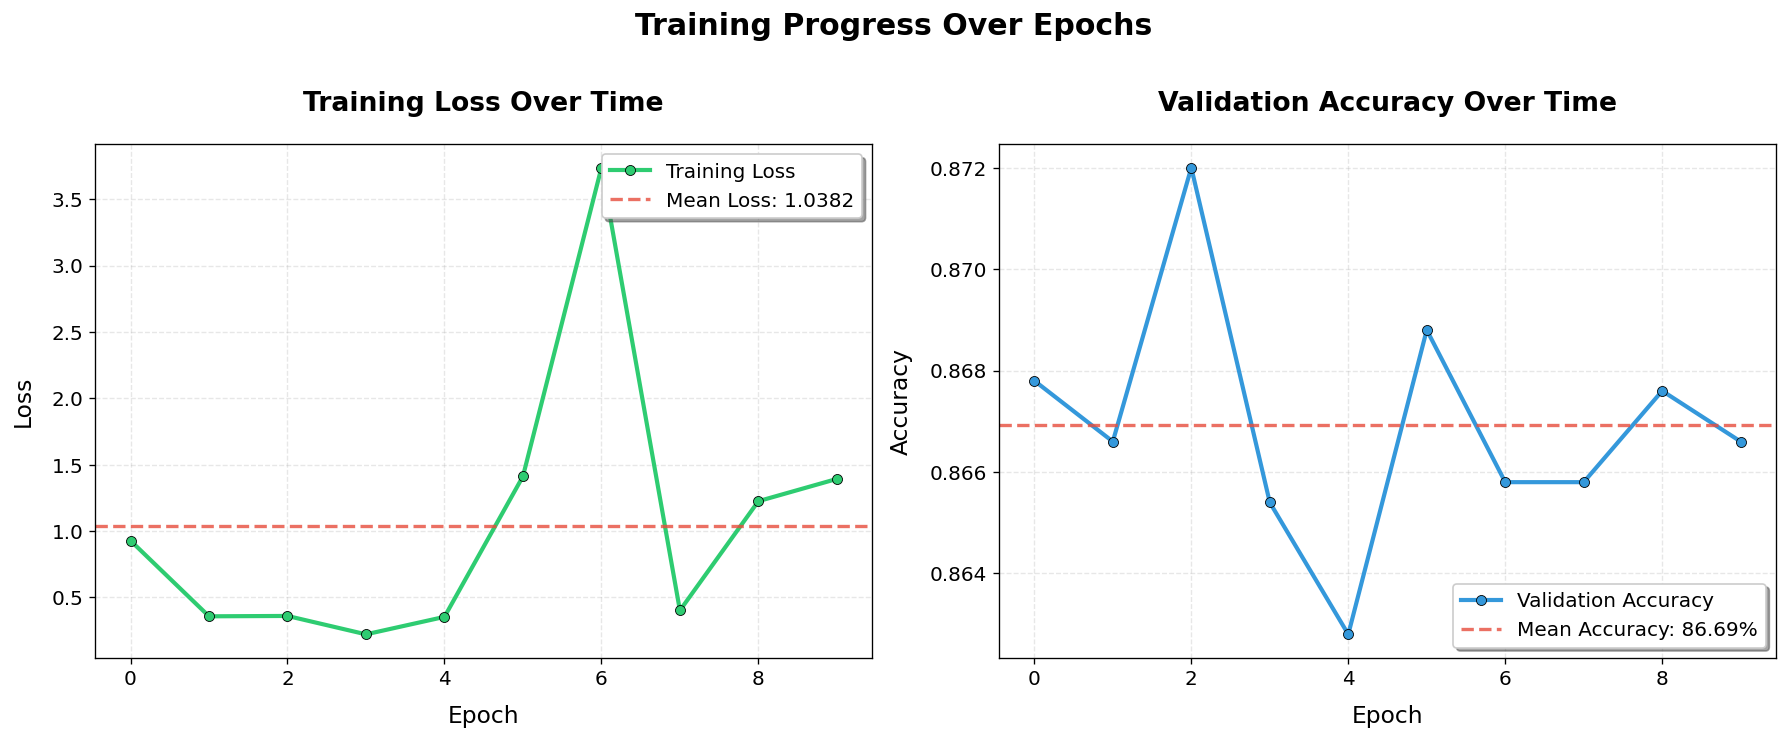


              📊 Training Summary Statistics 📊               
• Final Loss: 1.3920
• Final Accuracy: 86.66%
• Best Accuracy: 87.20%



In [ ]:
plot_training(densenet121_train)

#### VGG16

Training process for the VGG16 model:

In [ ]:
vgg16_train = train(vgg16, vgg_optimiser, epochs)

Epoch:   1/10 | Loss: 1.133635 | Accuracy: 87.16% >> 279.76 seconds
Epoch:   2/10 | Loss: 0.077049 | Accuracy: 87.04% >> 279.30 seconds
Epoch:   3/10 | Loss: 0.115293 | Accuracy: 87.94% >> 279.68 seconds
Epoch:   4/10 | Loss: 0.002290 | Accuracy: 88.12% >> 279.57 seconds
Epoch:   5/10 | Loss: 0.005974 | Accuracy: 88.00% >> 279.59 seconds
Epoch:   6/10 | Loss: 0.393800 | Accuracy: 87.50% >> 279.35 seconds
Epoch:   7/10 | Loss: 0.055514 | Accuracy: 88.78% >> 279.55 seconds
Epoch:   8/10 | Loss: 0.064445 | Accuracy: 89.10% >> 279.39 seconds
Epoch:   9/10 | Loss: 0.003951 | Accuracy: 87.10% >> 279.41 seconds
Epoch:  10/10 | Loss: 0.014403 | Accuracy: 87.78% >> 279.49 seconds


Plotting the progession of Loss and Accuracy of the VGG16 model over the training epochs

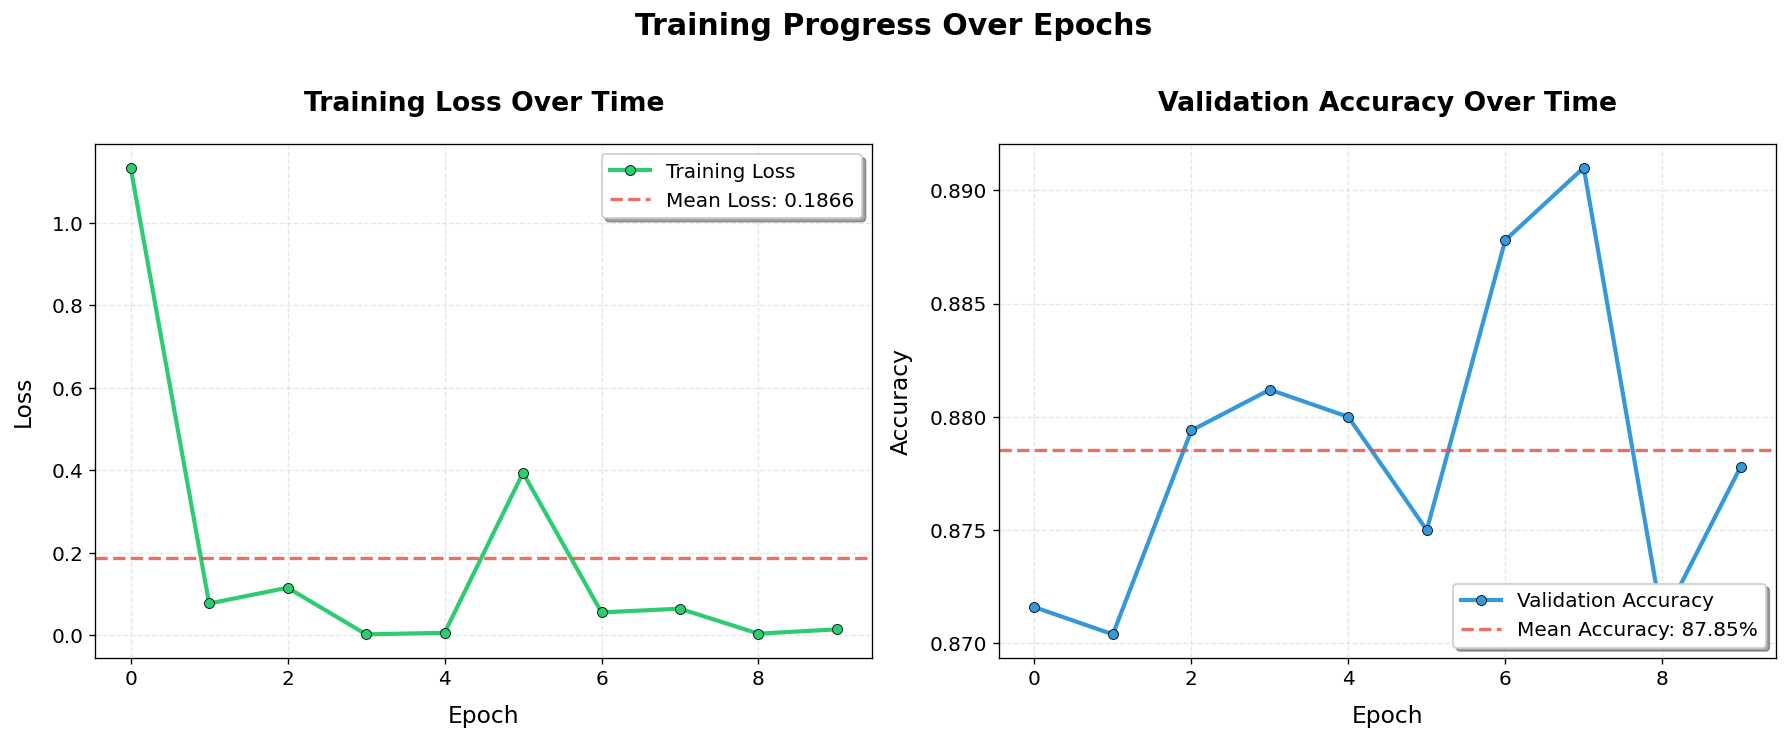


              📊 Training Summary Statistics 📊               
• Final Loss: 0.0144
• Final Accuracy: 87.78%
• Best Accuracy: 89.10%



In [ ]:
plot_training(vgg16_train)

#### AlexNet

Training process for the AlexNet model:

In [ ]:
alexnet_train = train(alexnet, alexnet_optimiser, epochs)

Epoch:   1/10 | Loss: 0.909945 | Accuracy: 81.38% >> 74.01 seconds
Epoch:   2/10 | Loss: 0.463284 | Accuracy: 83.10% >> 74.39 seconds
Epoch:   3/10 | Loss: 0.809222 | Accuracy: 85.66% >> 74.34 seconds
Epoch:   4/10 | Loss: 0.055755 | Accuracy: 85.56% >> 74.37 seconds
Epoch:   5/10 | Loss: 0.161560 | Accuracy: 86.22% >> 73.87 seconds
Epoch:   6/10 | Loss: 0.170574 | Accuracy: 86.40% >> 74.39 seconds
Epoch:   7/10 | Loss: 0.604333 | Accuracy: 87.02% >> 74.53 seconds
Epoch:   8/10 | Loss: 0.454660 | Accuracy: 87.70% >> 74.11 seconds
Epoch:   9/10 | Loss: 0.088775 | Accuracy: 86.72% >> 74.55 seconds
Epoch:  10/10 | Loss: 0.086793 | Accuracy: 87.60% >> 74.42 seconds


Plotting the progession of Loss and Accuracy of the AlexNet model over the training epochs

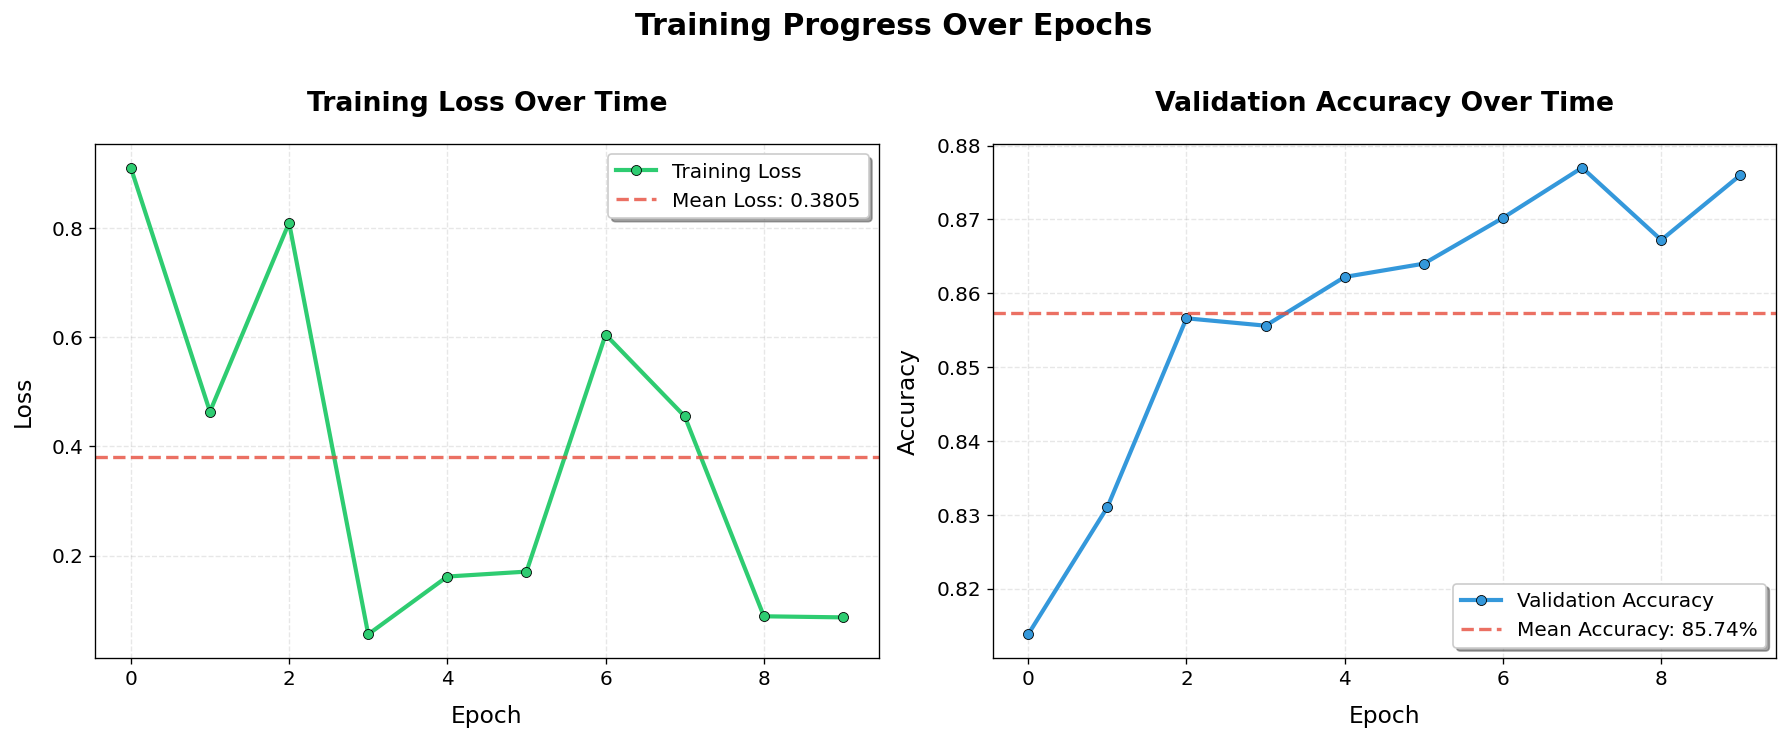


              📊 Training Summary Statistics 📊               
• Final Loss: 0.0868
• Final Accuracy: 87.60%
• Best Accuracy: 87.70%



In [ ]:
plot_training(alexnet_train)

### Final Accuracy for all models with Test set

After completing the training loop for each one of the models, the accuracy was evaluated for each on of them by using the test portion of the dataset.
In the next section, we can find printed the accuracy percentage for each one of the pre-trained models evaluated:

In [ ]:
resnet_test_acc = accuracy(resnet18, test_loader)
densenet_test_acc = accuracy(densenet121, test_loader)
vgg_test_acc = accuracy(vgg16, test_loader)
alexnet_test_acc = accuracy(alexnet, test_loader)

print(f'Accuracy Model 1 (Resnet18): {resnet_test_acc*100:.2f}%')
print(f"Accuracy Model 2 (DenseNet121): {densenet_test_acc*100:.2f}%")
print(f'Accuracy Model 3 (VGG16): {vgg_test_acc*100:.2f}%')
print(f'Accuracy Model 4 (AlexNet): {alexnet_test_acc*100:.2f}%')

Accuracy Model 1 (Resnet18): 80.74%
Accuracy Model 2 (DenseNet121): 86.81%
Accuracy Model 3 (VGG16): 87.03%
Accuracy Model 4 (AlexNet): 87.08%


### Average Execution Time for training loop

Other variable that was analyzed during the progress of this activity was the training time of each model. This because, as the models complexity rises, so does the computational resources neded for the training, which can translate in monetary cost when applying this model to production-level tasks.

In [ ]:
resnet_avg_exec_time = np.mean(restnet18_train['exec_time'])
densenet_avg_exec_time = np.mean(densenet121_train['exec_time'])
vgg_avg_exec_time = np.mean(vgg16_train['exec_time'])
alexnet_avg_exec_time = np.mean(alexnet_train['exec_time'])

print(f'Average Execution Time Model 1 (Resnet18): {resnet_avg_exec_time:.2f} seconds per epoch')
print(f'Average Execution Time Model 2 (DenseNet121): {densenet_avg_exec_time:.2f} seconds per epoch')
print(f'Average Execution Time Model 3 (VGG16): {vgg_avg_exec_time:.2f} seconds per epoch')
print(f'Average Execution Time Model 4 (AlexNet): {alexnet_avg_exec_time:.2f} seconds per epoch')

Average Execution Time Model 1 (Resnet18): 76.37 seconds per epoch
Average Execution Time Model 2 (DenseNet121): 167.97 seconds per epoch
Average Execution Time Model 3 (VGG16): 279.51 seconds per epoch
Average Execution Time Model 4 (AlexNet): 74.30 seconds per epoch


# 🧠 Discussion & Challenges 🚨

# 👥 Team Members Comments and Conclusions 🌟

---

### 🎓 **Luis Gerardo Sanchez Salazar (A01232963)**

During this exercise, we were able to successfully use the transfer learning technique, which consists of adding previously trained model architectures and taking advantage of its results to improve the overall performance of neural network models. This is especially useful when it comes to image and video processing, since images tend to share visible features like edges, colors, shapes, among others; all these features have been heavily studied and its recognition has been applied to the pre-trained models. Using this previous knowledge is a smart way of approaching similar problems without having to start from scratch.

I personally like to compare this with how the human brain works, which I would think of something like having a previous knowledge of a certain topic, let's say dog breeds, and then studying different types of wolves; this in the sense that previous knowledge acquired for the dog breed recognition is *reutilized* when analyzing a new species. By previously knowing dogs, the brain knows that to identify wolves, certain important features like size, color, and ear shape would be important during completing the new task.



Other important matter that I would like to personally highlight is the computing process. With this activity, training times increased considerably when comparing to previous activities. By taking advantage of a GPU, training times are considerably decreased; however, this could get expensive if the resources are not managed properly. Different model structures convey in different execution times.

In the results section of this notebook, it was noted that based on accuracy, VGG16 performed better compared to two of the other models with a value of around 87%; however, its processing time is considerably higher, resulting in an average of ~2.5 minutes per epoch. Models like DenseNet121 was not that far when it comes to accuracy (around 86%); however, when it comes to time per epoch, DenseNet was more efficient (< 2 minutes per epoch). With models like ResNet18, results achieved 80% but could potentially be improved by adding more linear layers to the model. Finally, AlexNet, with a result of over 87% accuracy, with execution times per epoch of a little bit over a minute, is considered to be the more efficient model during this test.


Another challenge faced during this exercise was getting to understand what and how to alter the different sections of the pre-trained models, since for example, VGG16 and AlexNet have a final module with several fully connected layers, in comparison to DenseNet121 and ResNet18 that only have a single fully connected layer at the end. During this challenge, it was learned how to manipulate the model to keep the original architecture while adding more linear layers to complete the new task successfully.


It is important to mention as well how the theory learned during the previous activity related to convolutional neural networks set the bedrock for this new challenge, especially when it comes to tensor sizes and how they change depending on model structure and input size. By now knowing how to manually calculate the input size required for a layer based on its predecessor, with the function designed to perform the multiplication of the different dimensions of the input tensor made it easier to understand and apply while using transfer learning.


Transfer learning is a really powerful technique that most likely will use in future applications when it comes to image recognition using deep learning models.

---

### 🎓 **Javier Augusto Rebull Saucedo (A01795838)**

#### **Reflection on Transfer Learning and Model Performance**

This activity *really* solidified my understanding of Transfer Learning and **showed me how practical it is** in the real world of deep learning. Working with pre-trained models like ResNet18, DenseNet121, VGG16, and AlexNet **was a hands-on demonstration of how different model designs affect not just accuracy, but also how quickly and efficiently they run.**

*It was particularly eye-opening* to see how I could **take these existing, powerful models and adapt them to a completely new dataset – without having to build something from the ground up.** This **isn't just about saving time; it dramatically cuts down on the computing power needed**, which is *huge* for making AI scalable. A **critical skill I developed was learning exactly *how* to tweak these models – things like swapping out the final fully connected layers or changing the activation functions to fit the new task.**

Comparing the different architectures **drove home the point that there's always a trade-off *between accuracy and speed*. My results really highlighted this:**
    *   **AlexNet and VGG16 achieved the highest accuracies (87.08% and 87.03%, respectively).** *It makes sense to mention the top performers together.*
    *  **However, VGG16 was *by far* the slowest, averaging a whopping 279.51 seconds per epoch.**
    *   **AlexNet, despite its top accuracy, was surprisingly the *fastest*, averaging only 74.30 seconds per epoch.** *This is a key finding and deserves emphasis.*
    *  **ResNet18 (80.74% accuracy) was also quite fast at 76.37 seconds per epoch, showing a good balance for quicker, *though less accurate*, results.**
    *    **DenseNet121 landed in the middle, with 86.81% accuracy but taking 167.97 seconds per epoch.**

*I added a bulleted list to clearly present the results and comparisons. This makes the performance differences much easier to grasp.*

Optimizing the computational load was another important challenge. **Using CUDA to tap into the GPU was absolutely essential** for handling these deep learning workloads efficiently. It **highlighted how crucial hardware optimization is when you're dealing with these complex models.**

#### **Conclusion**

**Transfer Learning is a total game-changer**. It's all about **letting models use what they've already learned**, which makes training way faster and more efficient. This is *especially* useful for image classification, because these pre-trained models are already experts at recognizing basic things like edges, colors, and textures.

But **it's not just about slapping a pre-trained model onto a new problem.** You *really* need to **understand the model's architecture, know how to modify the right layers, and, most importantly, find the right balance between getting accurate results and keeping the computational costs manageable.** Being able to **weigh the pros and cons of different architectures, *as my results clearly demonstrated*,** is *absolutely critical* in the real world, where you're often limited by the resources you have.

This experience **has definitely sparked my curiosity to dive deeper into** more advanced fine-tuning techniques, figuring out the best parameter settings, and understanding *why* models make the decisions they do (model interpretability). **Transfer Learning shows that starting from scratch isn't always necessary – in AI, just like in life, building on what's already been learned is often the smartest move.**


#### **Fun Fact**

Did you know that Transfer Learning is inspired by how our brains work? Just like we use what we've learned before to pick up new skills more quickly (like learning a new language when you already know a similar one), AI models use pre-trained knowledge to become more efficient. This means that AI isn't just mimicking human intelligence—it’s learning in a similar way! 🚀

---

### 🎓 José Manuel Toral Cruz (A01122243)

**Transfer Learning and Model Performance**

This project successfully explored **Transfer Learning** by applying pre-trained deep learning models to the **CIFAR-10 dataset**. Four different architectures—**ResNet18, DenseNet121, VGG16, and AlexNet**—were analyzed, adapted, and trained to evaluate their performance in terms of **accuracy and computational efficiency**.

**Key Takeaways**

1. *Effectiveness of Transfer Learning**
   Utilizing pre-trained models significantly improved classification accuracy while reducing the training time compared to training from scratch. This highlights the power of leveraging prior knowledge in deep learning tasks.

2. *Model Performance Comparison*
   - **VGG16** achieved the highest accuracy (\~87%), but at a higher computational cost (\~2.5 minutes per epoch).
   - **DenseNet121** showed strong performance (\~86%) with better efficiency (+2 minutes per epoch), making it a balanced choice.
   - **ResNet18 and AlexNet** delivered similar accuracy (\~80-82%) but with faster training times (\~1 minute per epoch), making them suitable for lower-resource environments.

3. *Computational Trade-offs*
   As model complexity increases, execution time also rises. While larger models tend to generalize better, they also require more computational power, making resource allocation a key factor in model selection.

4. *Challenges & Learning Experiences*
   - Understanding and modifying pre-trained model architectures was a crucial step, especially when dealing with models that have multiple fully connected layers (e.g., VGG16, AlexNet).
   - Managing tensor sizes across different architectures required careful attention, particularly when adding new layers to the existing structures.

5. **The Role of CUDA in Training Efficiency**
  - One crucial factor in this experiment was the use of **CUDA (Compute Unified Device Architecture)**, which allowed training to be performed on a **GPU instead of a CPU**. This significantly **reduced training time** and enabled the models to process large batches of images more efficiently.

This experiment demonstrated that **choosing the right pre-trained model** depends on the **balance between accuracy and computational efficiency**. Transfer learning provides a **powerful shortcut** for improving model performance without extensive training, making it an essential technique for real-world deep learning applications.


---

### 🎓 Juan Carlos Pérez Nava (A01795941)

This exercise explored transfer learning with several pre-trained models(ResNet18, DenseNet121, VGG16, and AlexNet)providing a direct understanding of their structure and functionality. This hands-on approach allowed for an in-depth analysis of each model's layers and operations.

Furthermore, the final layers of each model were modified to align with the specific output requirements of the training dataset. This customization adapted the models to the problem at hand, optimizing their performance and improving prediction accuracy.

Finally, the models were compared in terms of both performance and training time. This comparison yielded valuable insights into their respective efficiency and effectiveness, facilitating the selection of the most suitable model based on available resources and project objectives.

In summary, this exercise not only fostered a deep understanding of the architecture and functionality of various neural network models but also showcased the flexibility and power of transfer learning by enabling the customization of pre-trained models for specific tasks.


---

### 🎓 Oscar Enrique García García (A01016093)

With this activity, we were able to apply in a complete flow, many of the concepts learned in the past weeks. We could also apply the concept of transfer learning. This concept confirms us that our problematic is not unique in the world and that surely many solutions have already been implemented previously.

Transfer learning allows us to take advantage from other models and to apply their previous training with our own classification problems. Specially, with image classification problems, this is a very common thing, because at the end, images of a specific topic are not very different from other images: they have a color mix, specific hue, brightness, position, but also specific patterns.

With this in mind, if a pre-trained model is able to recognize all these characteristics in a specific set of images, why wouldn't it be able to recognize in another set?

On the other hand, we could see that taking advantage of these pre-trained models, not only helps us to improve our model's performance, but also saves us a lot of processing time. Models that had a lot of layers can exhaust our processing resources very quickly; however, with this technique we could save a lot of processing time and resources, without sacrificing the model's performance.

Another thing that we learned with the implementation of this activity is that there are many pre-trained models that could help with our own deep learning problems; however, it will be our responsibility to decide which of them bests fits each of our needs in terms of performance, costs, processing time, available resources, budget, objectives, etc.

What are we willing to sacrifice based on what we want to achieve with the model implementation?

---

# References

### 📚 **Books**

Raschka, S., Liu, Y. (., Mirjalili, V., & Dzhulgakov, D. (2022). *Machine Learning with PyTorch and Scikit-Learn: Develop Machine Learning and Deep Learning Models with Python*. Packt Publishing.

### 📄 **Papers**

*   He, K., Zhang, X., Ren, S., & Sun, J. (2015). *Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification*.  Proceedings of the IEEE International Conference on Computer Vision (ICCV). https://arxiv.org/pdf/1502.01852.pdf
*   He, K., Zhang, X., Ren, S., & Sun, J. (2016). *Deep Residual Learning for Image Recognition*.  Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR). https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf
*   Ioffe, S., & Szegedy, C. (2015). *Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift*.  Proceedings of the 32nd International Conference on Machine Learning (ICML). https://arxiv.org/pdf/1502.03167.pdf
*  Krizhevsky, A. (2009). *Learning multiple layers of features from tiny images* (Technical Report). University of Toronto. https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf
*   Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). *ImageNet Classification with Deep Convolutional Neural Networks*.  Advances in Neural Information Processing Systems (NIPS). https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf
* LeCun, Y., Bengio, Y., & Haffner, P. (2004). Learning invariant features through unsupervised learning. Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR).
*   Simonyan, K., & Zisserman, A. (2015). *Very Deep Convolutional Networks for Large-Scale Image Recognition*.  International Conference on Learning Representations (ICLR). https://arxiv.org/pdf/1409.1556.pdf

### 🎥 **Videos**

*   [Pepe Cantoral, Ph.D.]. (2021, March 18). *Gradiente de la Función de Pérdida “Cross Entropy” con Softmax - Deep Learning - (Parte 8)* [Video]. YouTube. https://youtu.be/mSqaQt6Dnow
*   [Pepe Cantoral, Ph.D.]. (2021, March 19). *Backpropagation - Gradient Descent, Ejemplo completo –Fundamentos de Deep Learning – (Parte 9)* [Video]. YouTube. https://youtu.be/_sej5wurIsg
*   [Pepe Cantoral, Ph.D.]. (2021, March 27). *Funciones de Activación – Fundamentos de Deep Learning – (Parte 10)* [Video]. YouTube. https://youtu.be/IdlYuBKeFXo
*   [Pepe Cantoral, Ph.D.]. (2021, March 31). *Redes Neuronales Multi-Capa / Deep Neural Networks – Fundamentos de Deep Learning -(Teoría parte 11)* [Video]. YouTube. https://youtu.be/Xc2Gsx2DkJA
*   [Pepe Cantoral, Ph.D.]. (2021, May 15). *¡Red Neuronal Desde Cero estilo FRAMEWORK de DEEP LEARNING!* [Video]. YouTube. https://youtu.be/_shpKyA89QQ
*   [Pepe Cantoral, Ph.D.]. (2021, May 18). *¡Red Neuronal Desde Cero estilo FRAMEWORK de DEEP LEARNING - Parte 2!* [Video]. YouTube. https://youtu.be/l2v2mVcOx6o
*   [Pepe Cantoral, Ph.D.]. (2021, July 6). *¡Red Neuronal usando PyTorch! PyTorch tutorial* [Video]. YouTube. https://youtu.be/qQELiV1_GHA
*   [Pepe Cantoral, Ph.D.]. (2021, December 11). *Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 1* [Video]. YouTube. https://www.youtube.com/watch?v=cUa3Jug3TiA
*   [Pepe Cantoral, Ph.D.]. (2021, December 13). *Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 2* [Video]. YouTube. https://www.youtube.com/watch?v=xkZD5eB5KVM
*   [Pepe Cantoral, Ph.D.]. (2021, December 17). *Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 3* [Video]. YouTube. https://www.youtube.com/watch?v=XkqgTaWle0I
*   [Pepe Cantoral, Ph.D.]. (2021, December 17). *Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 4* [Video]. YouTube. https://youtu.be/w9ECvUxMAJQ
*   [Pepe Cantoral, Ph.D.]. (2022, January 15). *Red Neuronal Convolucional en PyTorch / Tutorial de PyTorch para CNN - Parte 1* [Video]. YouTube. https://youtu.be/yUB9JQQVtoU
*   [Pepe Cantoral, Ph.D.]. (2022, January 18). *Red Neuronal Convolucional en PyTorch / Tutorial de PyTorch para CNN - Parte 2* [Video]. YouTube. https://youtu.be/NLrQZwnWjvI
*    [Pepe Cantoral, Ph.D.]. (2022, April 27). *¿Qué es ResNet? – Redes Neuronales Residuales* [Video]. YouTube. https://youtu.be/gKCuWBpg1bU


---
## 📚 **Web**

1. PyTorch. (2025). Models in torchvision. PyTorch. https://pytorch.org/vision/main/models.html